<img src="https://rhyme.com/assets/img/logo-dark.png" align="center">

<h2 align="center"> Univariate Linear Regression </h2>

### Task 2: Load the Data and Libraries
---

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
data = pd.read_csv('bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Task 3: Visualize the Data
---

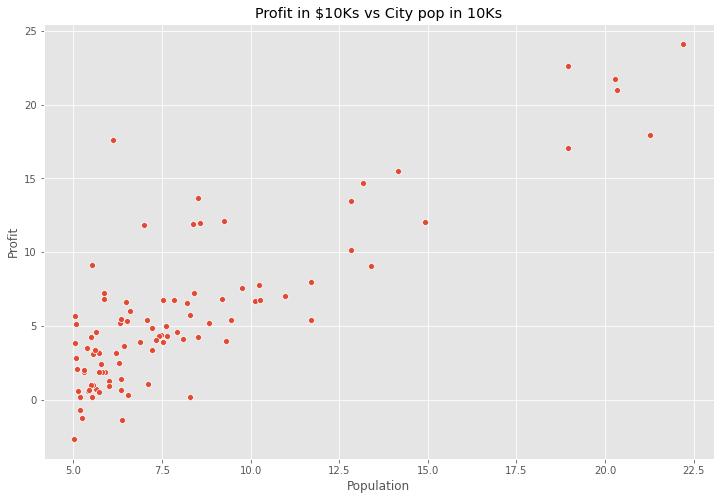

In [8]:
ax= sns.scatterplot(x='Population',y='Profit',data=data)
ax.set_title('Profit in $10Ks vs City pop in 10Ks');

### Task 4: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [9]:
def cost_function(X,y,theta):
    m = len(y)
    y_pred=X.dot(theta)
    error=(y_pred - y)**2
    
    return 1/(2*m)*np.sum(error)

In [11]:
m = data.Population.values.size
X=np.append(np.ones((m,1)), data.Population.values.reshape(m,1),axis=1)
y=data.Profit.values.reshape(m,1)
theta = np.zeros((2,1))

cost_function(X,y,theta)

32.072733877455676

### Task 5: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [24]:
def gradient_des(X,y,theta,alpha,iterations):
    m = len(y)
    costs=[]
    for i in range(iterations):
        y_pred=X.dot(theta)
        error=np.dot(X.transpose(),(y_pred - y))
        theta -=alpha* 1/m * error
        costs.append(cost_function(X,y,theta))
    return theta,costs

In [25]:
theta,costs=gradient_des(X,y,theta,alpha=0.01,iterations=2000)

print("h(x) = {} + {}x1".format(str(round(theta[0,0],2)), 
                                str(round(theta[1,0],2))))

h(x) = -3.9 + 1.19x1


### Task 6: Visualising the Cost Function $J(\theta)$
---

In [ ]:
from mpl_toolkits.mplot3d import Axe3D

In [20]:
theta0 =np.linspace(-10,10,100)
theta1 =np.linspace(-1,4,100)

cost_values=np.zeros((len(theta0),len(theta1)))

for i in range(len(theta0)):
    for j in range(len(theta1)):
        t=np.array([theta0[i],theta1[j]])
        cost_values[i,j]=cost_function(X,y,t)

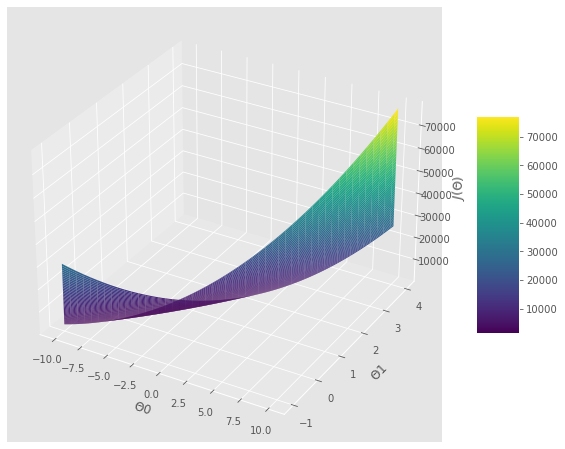

In [22]:
fig=plt.figure(figsize=(12,8))
ax=fig.gca(projection='3d')

surf=ax.plot_surface(theta0,theta1,cost_values,cmap='viridis')
fig.colorbar(surf,shrink=0.5,aspect=5)

plt.xlabel("$\Theta0$")
plt.ylabel("$\Theta1$")
ax.set_zlabel("$J(\Theta)$")
plt.show()

### Task 7: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

Text(0.5, 1.0, 'values of the cost func over iterations of Gradient Des')

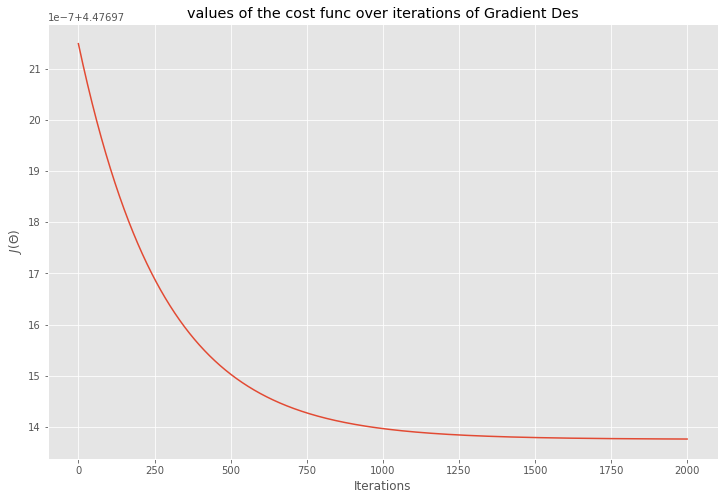

In [26]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("values of the cost func over iterations of Gradient Des")



### Task 8: Training Data with Linear Regression Fit
---

In [27]:
theta.shape

(2, 1)

In [28]:
theta

array([[-3.89570181],
       [ 1.1930257 ]])

Text(0.5, 1.0, 'Lin Reg Fit')

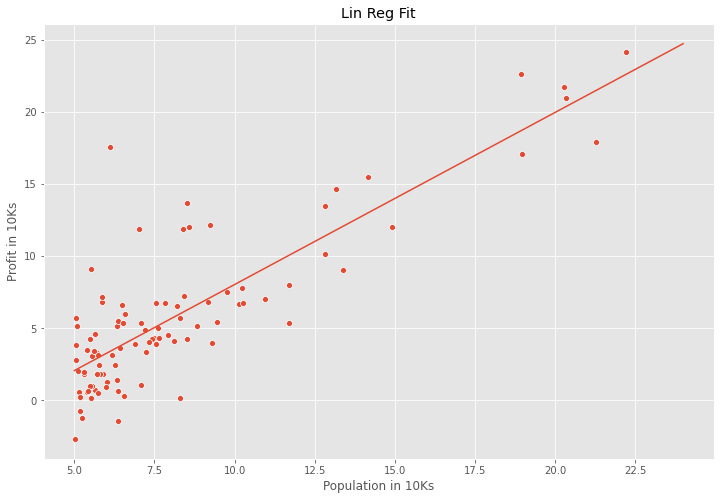

In [30]:
theta =np.squeeze(theta)
sns.scatterplot(x='Population',y='Profit',data=data)

x_val=[x for x in range(5,25)]
y_val=[(x*theta[1]+theta[0]) for x in x_val]
sns.lineplot(x_val,y_val)

plt.xlabel("Population in 10Ks")
plt.ylabel("Profit in 10Ks")
plt.title("Lin Reg Fit")

### Task 9: Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [32]:
def predict(x,theta):
    y_pred=np.dot(theta.transpose(),x)
    return y_pred

In [33]:
y_pred1=predict(np.array([1,4]),theta) *10000
print("for a population of 40k, the model predicts a profit of $" + str(round(y_pred1,0)))

for a population of 40k, the model predicts a profit of $8764.0


In [34]:
y_pred2=predict(np.array([1,8.3]),theta) *10000
print("for a population of 83k, the model predicts a profit of $" + str(round(y_pred2,0)))

for a population of 83k, the model predicts a profit of $60064.0
